<a href="https://colab.research.google.com/github/tanujpokhriyal2005/Machine-Learning/blob/main/Regression_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [7]:
df = pd.read_csv('placement (3).csv')

In [8]:
df.shape

(200, 2)

In [9]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

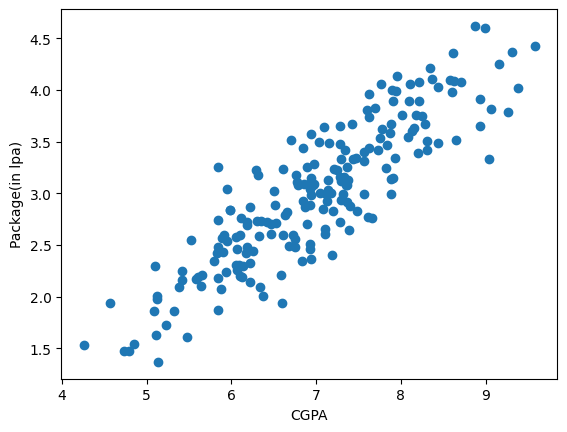

In [10]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [11]:
X = df.iloc[:,0:1]
Y = df.iloc[:,-1]

In [13]:
Y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(X_train,Y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

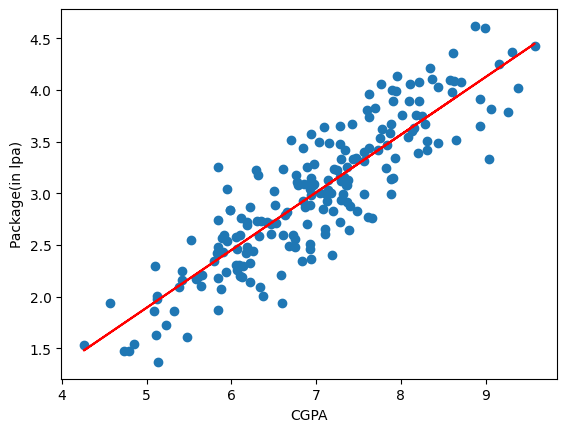

In [22]:
# best fit line
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
Y_pred = lr.predict(X_test)

In [25]:
Y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [26]:
print("MAE",mean_absolute_error(Y_test,Y_pred))

MAE 0.2884710931878175


In [27]:
print("MSE",mean_squared_error(Y_test,Y_pred))

MSE 0.12129235313495527


In [28]:
print("RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))

RMSE 0.34827051717731616


In [31]:
print("r2",r2_score(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)

r2 0.780730147510384


In [32]:
#adjusted R2 score
X_test.shape

(40, 1)

In [33]:
1-((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [35]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.526978,3.26
1,5.12,0.605042,1.98
2,7.82,0.202683,3.25
3,7.42,0.017318,3.67
4,6.94,0.350145,3.57


Text(0, 0.5, 'Package(in lpa)')

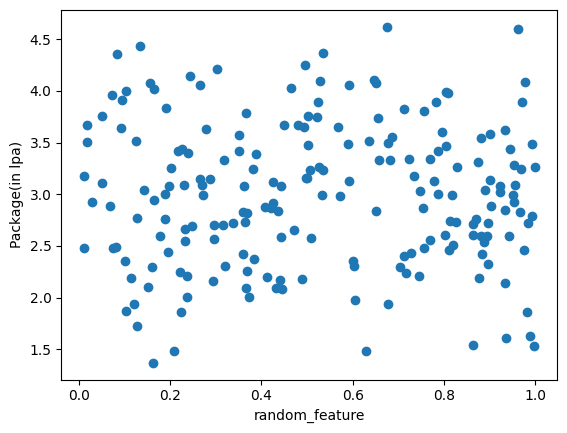

In [36]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [37]:
X = new_df1.iloc[:,0:2]
Y = new_df1.iloc[:,-1]

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_train,Y_train)

LinearRegression()

In [41]:
Y_pred = lr.predict(X_test)

In [42]:
print("R2 score",r2_score(Y_test,Y_pred))

R2 score 0.7802248552856101


In [43]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7688777230514858

Lesser than before that means the feature was useless


In [44]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]


In [45]:
new_df2.sample(5)

,cgpa,iq,package
54,6.86,3.49,3.09
13,6.93,3.69,2.89
87,8.09,4.25,3.55
26,8.31,2.22,3.42
177,7.09,3.94,3.64


Text(0, 0.5, 'Package(in lpa)')

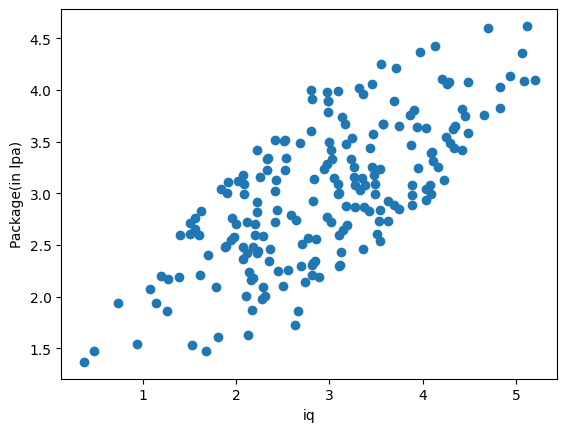

In [46]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')


In [47]:
np.random.randint(-100,100)

19

In [48]:
X = new_df2.iloc[:,0:2]
Y = new_df2.iloc[:,-1]

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [50]:
lr=LinearRegression()

In [51]:
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

In [52]:
print("r2 score",r2_score(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)

r2 score 0.8339228645503232


increase from previous that means the feature contributed

In [53]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8249457220935839